# Using Ragas to Evaluate a RAG Application built with LangChain and LangGraph

In the following notebook, we'll be looking at how [Ragas](https://github.com/explodinggradients/ragas) can be helpful in a number of ways when looking to evaluate your RAG applications!

While this example is rooted in LangChain/LangGraph - Ragas is framework agnostic (you don't even need to be using a framework!).

- 🤝 Breakout Room #1
  1. Task 1: Installing Required Libraries
  2. Task 2: Set Environment Variables
  3. Task 3: Synthetic Dataset Generation for Evaluation using Ragas
  4. Task 4: Evaluating our Pipeline with Ragas
  5. Task 6: Making Adjustments and Re-Evaluating

But first! Let's set some dependencies!

## Dependencies and API Keys:

We'll also need to provide our API keys.

First, OpenAI's for our LLM/embedding model combination!

In [1]:
import os
from getpass import getpass
os.environ["OPENAI_API_KEY"] = getpass("Please enter your OpenAI API key!")

## Generating Synthetic Test Data

We wil be using Ragas to build out a set of synthetic test questions, references, and reference contexts. This is useful because it will allow us to find out how our system is performing.

> NOTE: Ragas is best suited for finding *directional* changes in your LLM-based systems. The absolute scores aren't comparable in a vacuum.

### Data Preparation

We'll prepare our data - which should hopefull be familiar at this point since it's our **"How people use AI" Data** use-case!

Next, let's load our data into a familiar LangChain format using the `DirectoryLoader`.

In [2]:
from langchain_community.document_loaders import DirectoryLoader
from langchain_community.document_loaders import PyMuPDFLoader


path = "data/"
loader = DirectoryLoader(path, glob="*.pdf", loader_cls=PyMuPDFLoader)
docs = loader.load()

### Knowledge Graph Based Synthetic Generation

Ragas uses a knowledge graph based approach to create data. This is extremely useful as it allows us to create complex queries rather simply. The additional testset complexity allows us to evaluate larger problems more effectively, as systems tend to be very strong on simple evaluation tasks.

Let's start by defining our `generator_llm` (which will generate our questions, summaries, and more), and our `generator_embeddings` which will be useful in building our graph.

### Abstracted SDG

The above method is the full process - but we can shortcut that using the provided abstractions!

This will generate our knowledge graph under the hood, and will - from there - generate our personas and scenarios to construct our queries.



In [ ]:
from ragas.llms import LangchainLLMWrapper
from ragas.embeddings import LangchainEmbeddingsWrapper
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAIEmbeddings
generator_llm = LangchainLLMWrapper(ChatOpenAI(model="gpt-4.1-mini"))
generator_embeddings = LangchainEmbeddingsWrapper(OpenAIEmbeddings())

In [4]:
from ragas.testset import TestsetGenerator

generator = TestsetGenerator(llm=generator_llm, embedding_model=generator_embeddings)
dataset = generator.generate_with_langchain_docs(docs, testset_size=10)

Applying HeadlinesExtractor:   0%|          | 0/21 [00:00<?, ?it/s]

Applying HeadlineSplitter:   0%|          | 0/64 [00:00<?, ?it/s]

unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to ap

Applying SummaryExtractor:   0%|          | 0/39 [00:00<?, ?it/s]

Property 'summary' already exists in node 'c9bfc7'. Skipping!
Property 'summary' already exists in node 'd3f080'. Skipping!
Property 'summary' already exists in node '94ec26'. Skipping!
Property 'summary' already exists in node 'ae84fc'. Skipping!
Property 'summary' already exists in node '6d76bc'. Skipping!
Property 'summary' already exists in node '5d5ef8'. Skipping!
Property 'summary' already exists in node '478747'. Skipping!
Property 'summary' already exists in node '539255'. Skipping!
Property 'summary' already exists in node '2c7532'. Skipping!
Property 'summary' already exists in node '57f5a8'. Skipping!
Property 'summary' already exists in node '74137f'. Skipping!
Property 'summary' already exists in node '67fdf8'. Skipping!
Property 'summary' already exists in node '856bf3'. Skipping!
Property 'summary' already exists in node '506fa8'. Skipping!
Property 'summary' already exists in node '87f1d8'. Skipping!
Property 'summary' already exists in node 'f30a6e'. Skipping!
Property

Applying CustomNodeFilter:   0%|          | 0/6 [00:00<?, ?it/s]

Applying [EmbeddingExtractor, ThemesExtractor, NERExtractor]:   0%|          | 0/45 [00:00<?, ?it/s]

Property 'summary_embedding' already exists in node 'f30a6e'. Skipping!
Property 'summary_embedding' already exists in node '74137f'. Skipping!
Property 'summary_embedding' already exists in node '506fa8'. Skipping!
Property 'summary_embedding' already exists in node '6d76bc'. Skipping!
Property 'summary_embedding' already exists in node 'd3f080'. Skipping!
Property 'summary_embedding' already exists in node 'a98d42'. Skipping!
Property 'summary_embedding' already exists in node 'c9bfc7'. Skipping!
Property 'summary_embedding' already exists in node '478747'. Skipping!
Property 'summary_embedding' already exists in node '57f5a8'. Skipping!
Property 'summary_embedding' already exists in node 'd5805f'. Skipping!
Property 'summary_embedding' already exists in node '94ec26'. Skipping!
Property 'summary_embedding' already exists in node 'ae84fc'. Skipping!
Property 'summary_embedding' already exists in node '67fdf8'. Skipping!
Property 'summary_embedding' already exists in node '539255'. Sk

Applying [CosineSimilarityBuilder, OverlapScoreBuilder]:   0%|          | 0/2 [00:00<?, ?it/s]

Generating personas:   0%|          | 0/3 [00:00<?, ?it/s]

Generating Scenarios:   0%|          | 0/3 [00:00<?, ?it/s]

Generating Samples:   0%|          | 0/12 [00:00<?, ?it/s]

In [5]:
dataset.to_pandas()

,user_input,reference_contexts,reference,synthesizer_name
0,How do Korinek and Suh contribute to the discu...,[Introduction ChatGPT launched in November 202...,Korinek and Suh (2024) are cited as contributi...,single_hop_specifc_query_synthesizer
1,How did the launch of ChatGPT in November 2022...,[Introduction ChatGPT launched in November 202...,"ChatGPT was launched in November 2022, and by ...",single_hop_specifc_query_synthesizer
2,"According to Figure 23, how does ChatGPT usage...",[Variation by Occupation Figure 23 presents va...,Figure 23 presents variation in ChatGPT usage ...,single_hop_specifc_query_synthesizer
3,"According to Figure 23, how does ChatGPT usage...",[Variation by Occupation Figure 23 presents va...,Figure 23 presents variation in ChatGPT usage ...,single_hop_specifc_query_synthesizer
4,What does the data reveal about variation in C...,[<1-hop>\n\nVariation by Occupation Figure 23 ...,The data shows significant variation in ChatGP...,multi_hop_abstract_query_synthesizer
5,How does the rapid adoption of ChatGPT and gen...,[<1-hop>\n\nConclusion This paper studies the ...,The rapid adoption of ChatGPT and generative A...,multi_hop_abstract_query_synthesizer
6,How does the variation in ChatGPT usage by occ...,[<1-hop>\n\nVariation by Occupation Figure 23 ...,The variation in ChatGPT usage by occupation i...,multi_hop_abstract_query_synthesizer
7,How does the variation in ChatGPT usage by occ...,[<1-hop>\n\nVariation by Occupation Figure 23 ...,Variation in ChatGPT usage by occupation is ev...,multi_hop_abstract_query_synthesizer
8,How did the rapid global diffusion of ChatGPT ...,[<1-hop>\n\nConclusion This paper studies the ...,"By July 2025, ChatGPT had achieved an unpreced...",multi_hop_specific_query_synthesizer
9,wat is the signficance of July 2025 in terms o...,[<1-hop>\n\nConclusion This paper studies the ...,"By July 2025, ChatGPT had reached over 700 mil...",multi_hop_specific_query_synthesizer


## LangChain RAG

Now we'll construct our LangChain RAG, which we will be evaluating using the above created test data!

### R - Retrieval

Let's start with building our retrieval pipeline, which will involve loading the same data we used to create our synthetic test set above.

> NOTE: We need to use the same data - as our test set is specifically designed for this data.

In [6]:
path = "data/"
loader = DirectoryLoader(path, glob="*.pdf", loader_cls=PyMuPDFLoader)
docs = loader.load()

Now that we have our data loaded, let's split it into chunks!

In [7]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=0)
split_documents = text_splitter.split_documents(docs)
len(split_documents)

3122

#### ❓ Question: 

What is the purpose of the `chunk_overlap` parameter in the `RecursiveCharacterTextSplitter`?

##### ✅ Answer:
Chunk overlaping **helps preserving the meaning of sentences** that might get splitted and lost by the imposed specified chunck limit/boundary. It does this by overlaping a sequence of characters between consecutive chunks.

Next up, we'll need to provide an embedding model that we can use to construct our vector store.

In [8]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

Now we can build our in memory QDrant vector store.

In [9]:
from langchain_qdrant import QdrantVectorStore
from qdrant_client import QdrantClient
from qdrant_client.http.models import Distance, VectorParams

client = QdrantClient(":memory:")

client.create_collection(
    collection_name="use_case_data",
    vectors_config=VectorParams(size=1536, distance=Distance.COSINE),
)

vector_store = QdrantVectorStore(
    client=client,
    collection_name="use_case_data",
    embedding=embeddings,
)

We can now add our documents to our vector store.

In [10]:
_ = vector_store.add_documents(documents=split_documents)

Let's define our retriever.

In [11]:
retriever = vector_store.as_retriever(search_kwargs={"k": 3})

Now we can produce a node for retrieval!

In [12]:
def retrieve(state):
  retrieved_docs = retriever.invoke(state["question"])
  return {"context" : retrieved_docs}

### Augmented

Let's create a simple RAG prompt!

In [13]:
from langchain.prompts import ChatPromptTemplate

RAG_PROMPT = """\
You are a helpful assistant who answers questions based on provided context. You must only use the provided context, and cannot use your own knowledge.

### Question
{question}

### Context
{context}
"""

rag_prompt = ChatPromptTemplate.from_template(RAG_PROMPT)

### Generation

We'll also need an LLM to generate responses - we'll use `gpt-4o-nano` to avoid using the same model as our judge model.

In [14]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4.1-nano")

Then we can create a `generate` node!

In [16]:
def generate(state):
  docs_content = "\n\n".join(doc.page_content for doc in state["context"])
  messages = rag_prompt.format_messages(question=state["question"], context=docs_content)
  response = llm.invoke(messages)
  return {"response" : response.content}

### Building RAG Graph with LangGraph

Let's create some state for our LangGraph RAG graph!

In [17]:
from langgraph.graph import START, StateGraph
from typing_extensions import List, TypedDict
from langchain_core.documents import Document

class State(TypedDict):
  question: str
  context: List[Document]
  response: str

Now we can build our simple graph!

> NOTE: We're using `add_sequence` since we will always move from retrieval to generation. This is essentially building a chain in LangGraph.

In [18]:
graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

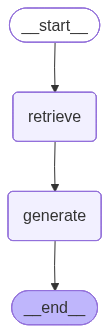

In [19]:
graph

Let's do a test to make sure it's doing what we'd expect.

In [20]:
response = graph.invoke({"question" : "What are the different kinds of loans?"})

In [21]:
response["response"]

'The provided context does not include information about the different kinds of loans.'

## Evaluating the App with Ragas

Now we can finally do our evaluation!

We'll start by running the queries we generated usign SDG above through our application to get context and responses.

In [22]:
for test_row in dataset:
  response = graph.invoke({"question" : test_row.eval_sample.user_input})
  test_row.eval_sample.response = response["response"]
  test_row.eval_sample.retrieved_contexts = [context.page_content for context in response["context"]]

In [23]:
dataset.samples[0].eval_sample.response

'Korinek and Suh contribute to the discussion on the economic impact of artificial intelligence by analyzing how ChatGPT offers economic value. They explore the development and deployment of ChatGPT and Generative AI more broadly, emphasizing the significance of its rapid adoption and usage trends in the economic context.'

Then we can convert that table into a `EvaluationDataset` which will make the process of evaluation smoother.

In [24]:
from ragas import EvaluationDataset

evaluation_dataset = EvaluationDataset.from_pandas(dataset.to_pandas())

We'll need to select a judge model - in this case we're using the same model that was used to generate our Synthetic Data.

In [ ]:
from ragas import evaluate
from ragas.llms import LangchainLLMWrapper

evaluator_llm = LangchainLLMWrapper(ChatOpenAI(model="gpt-4.1-mini"))

Next up - we simply evaluate on our desired metrics!

In [ ]:
from ragas.metrics import LLMContextRecall, Faithfulness, FactualCorrectness, ResponseRelevancy, ContextEntityRecall, NoiseSensitivity
from ragas import evaluate, RunConfig

custom_run_config = RunConfig(timeout=360)

baseline_result = evaluate(
    dataset=evaluation_dataset,
    metrics=[LLMContextRecall(), Faithfulness(), FactualCorrectness(), ResponseRelevancy(), ContextEntityRecall(), NoiseSensitivity()],
    llm=evaluator_llm,
    run_config=custom_run_config
)
baseline_result

Evaluating:   0%|          | 0/72 [00:00<?, ?it/s]

Exception raised in Job[14]: RateLimitError(Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4.1 in organization org-150POxgkQemAF6KyFkXmdhUB on tokens per min (TPM): Limit 30000, Used 30000, Requested 1561. Please try again in 3.122s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}})
Exception raised in Job[26]: RateLimitError(Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4.1 in organization org-150POxgkQemAF6KyFkXmdhUB on tokens per min (TPM): Limit 30000, Used 30000, Requested 1442. Please try again in 2.884s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}})
Exception raised in Job[44]: RateLimitError(Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4.1 in organization org-150POxgkQemAF6KyFkXmdhUB on tokens per min (TPM): Limit 30000, Used 30000, Reque

{'context_recall': 0.0494, 'faithfulness': 0.3618, 'factual_correctness': 0.3471, 'answer_relevancy': 0.5542, 'context_entity_recall': 0.0907, 'noise_sensitivity_relevant': 0.0156}

## Making Adjustments and Re-Evaluating

Now that we've got our baseline - let's make a change and see how the model improves or doesn't improve!

> NOTE: This will be using Cohere's Rerank model - please be sure to [sign-up for an API key!](https://docs.cohere.com/reference/about)

In [27]:
os.environ["COHERE_API_KEY"] = getpass("Please enter your Cohere API key!")


We'll first set our retriever to return more documents, which will allow us to take advantage of the reranking.

In [28]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=30)
split_documents = text_splitter.split_documents(docs)
len(split_documents)

embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

client = QdrantClient(":memory:")

client.create_collection(
    collection_name="use_case_data_new_chunks",
    vectors_config=VectorParams(size=1536, distance=Distance.COSINE),
)

vector_store = QdrantVectorStore(
    client=client,
    collection_name="use_case_data_new_chunks",
    embedding=embeddings,
)

_ = vector_store.add_documents(documents=split_documents)

adjusted_example_retriever = vector_store.as_retriever(search_kwargs={"k": 20})

Reranking, or contextual compression, is a technique that uses a reranker to compress the retrieved documents into a smaller set of documents.

This is essentially a slower, more accurate form of semantic similarity that we use on a smaller subset of our documents.

```
User Query → Embedding → Vector Search (k=20) → Reranker → Top-5 Documents → LLM
```

In [29]:
from langchain.retrievers.contextual_compression import ContextualCompressionRetriever
from langchain_cohere import CohereRerank

def retrieve_adjusted(state):
  compressor = CohereRerank(model="rerank-v3.5")
  compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor, base_retriever=adjusted_example_retriever, search_kwargs={"k": 5}
  )
  retrieved_docs = compression_retriever.invoke(state["question"])
  return {"context" : retrieved_docs}

We can simply rebuild our graph with the new retriever!

In [30]:
class AdjustedState(TypedDict):
  question: str
  context: List[Document]
  response: str

adjusted_graph_builder = StateGraph(AdjustedState).add_sequence([retrieve_adjusted, generate])
adjusted_graph_builder.add_edge(START, "retrieve_adjusted")
adjusted_graph = adjusted_graph_builder.compile()

In [31]:
response = adjusted_graph.invoke({"question" : "What are the different kinds of loans?"})
response["response"]

'The provided context does not specify the different kinds of loans.'

In [32]:
import time
import copy

rerank_dataset = copy.deepcopy(dataset)

for test_row in rerank_dataset:
  response = adjusted_graph.invoke({"question" : test_row.eval_sample.user_input})
  test_row.eval_sample.response = response["response"]
  test_row.eval_sample.retrieved_contexts = [context.page_content for context in response["context"]]
  time.sleep(4) # To try to avoid rate limiting.

In [33]:
rerank_dataset.samples[0].eval_sample.response

"Korinek and Suh contribute to the discussion on the economic impact of artificial intelligence by highlighting that the effects of AI extend beyond paid work to activity outside of work, such as home production. They emphasize that the impact on non-work activities is on a similar scale and potentially even larger than its impact on productivity in the workplace. Their analysis also notes that the observed decrease in work-related ChatGPT messages is mainly due to changing usage patterns within each user cohort rather than a shift in the overall composition of users. This contributes to understanding how rapid adoption and usage trends of AI, exemplified by ChatGPT's swift diffusion to over 700 million users and more than 2.5 billion messages per day by July 2025, are influencing everyday activities and economic behavior.\n"

In [34]:
rerank_evaluation_dataset = EvaluationDataset.from_pandas(rerank_dataset.to_pandas())

In [35]:
rerank_result = evaluate(
    dataset=rerank_evaluation_dataset,
    metrics=[LLMContextRecall(), Faithfulness(), FactualCorrectness(), ResponseRelevancy(), ContextEntityRecall(), NoiseSensitivity()],
    llm=evaluator_llm,
    run_config=custom_run_config
)
rerank_result

Evaluating:   0%|          | 0/72 [00:00<?, ?it/s]

Exception raised in Job[30]: RateLimitError(Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4.1 in organization org-150POxgkQemAF6KyFkXmdhUB on tokens per min (TPM): Limit 30000, Used 30000, Requested 1654. Please try again in 3.308s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}})
Exception raised in Job[25]: RateLimitError(Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4.1 in organization org-150POxgkQemAF6KyFkXmdhUB on tokens per min (TPM): Limit 30000, Used 29281, Requested 1596. Please try again in 1.754s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}})
Exception raised in Job[17]: RateLimitError(Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4.1 in organization org-150POxgkQemAF6KyFkXmdhUB on tokens per min (TPM): Limit 30000, Used 30000, Reque

{'context_recall': 0.4237, 'faithfulness': 0.7661, 'factual_correctness': 0.5600, 'answer_relevancy': 0.9577, 'context_entity_recall': 0.3327, 'noise_sensitivity_relevant': 0.1324}

#### ❓ Question: 

Which system performed better, on what metrics, and why?

##### ✅ Answer:

##### Plot a graph comparing the two evaluation results

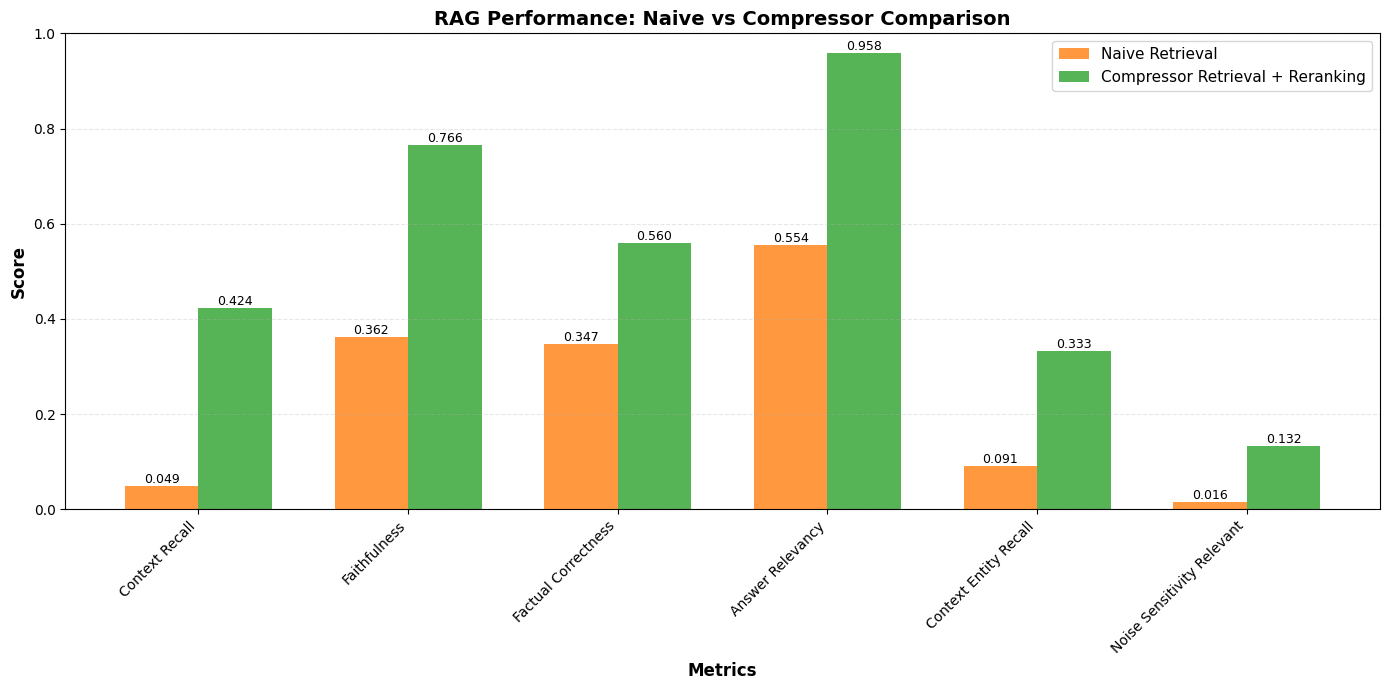


📊 Metric Improvements:
📈 Context Recall................ 0.0494 → 0.4237 (+0.3743, +758.5%)
📈 Faithfulness.................. 0.3618 → 0.7661 (+0.4043, +111.8%)
📈 Factual Correctness........... 0.3471 → 0.5600 (+0.2129, +61.3%)
📈 Answer Relevancy.............. 0.5542 → 0.9577 (+0.4034, +72.8%)
📈 Context Entity Recall......... 0.0907 → 0.3327 (+0.2420, +267.0%)
📈 Noise Sensitivity Relevant.... 0.0156 → 0.1324 (+0.1168, +747.5%)


In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for plotting
baseline_results_dict = baseline_result._repr_dict
rerank_results_dict = rerank_result._repr_dict
metrics = list(baseline_results_dict.keys())
baseline_values = list(baseline_results_dict.values())
rerank_values = list(rerank_results_dict.values())

# Create the bar chart
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 7))
bars1 = ax.bar(x - width/2, baseline_values, width, label='Naive Retrieval', alpha=0.8, color='#ff7f0e')
bars2 = ax.bar(x + width/2, rerank_values, width, label='Compressor Retrieval + Reranking', alpha=0.8, color='#2ca02c')

# Customize the plot
ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('RAG Performance: Naive vs Compressor Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([m.replace('_', ' ').title() for m in metrics], rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(0, 1)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Calculate improvements
print("\n📊 Metric Improvements:")
print("=" * 60)
for metric in metrics:
    baseline_val = baseline_results_dict[metric]
    rerank_val = rerank_results_dict[metric]
    diff = rerank_val - baseline_val
    pct_change = (diff / baseline_val * 100) if baseline_val != 0 else float('inf')
    symbol = "📈" if diff > 0 else "📉" if diff < 0 else "➡️"
    print(f"{symbol} {metric.replace('_', ' ').title():.<30} {baseline_val:.4f} → {rerank_val:.4f} ({diff:+.4f}, {pct_change:+.1f}%)")

Based on the comparison visualization above, we can see that the **second RAG system** achieved a significant better result **in all** metrics evaluated by RAGAS. The observed improvement can be attributed to the various adjustments applied to the sytem like:

 * use of bigger chunks (from 50 to 500) with token overlaping (from zero to 50)
 * bigger top rank results (from k=3 to k=20)
 * use of a Renranker Compressor **to improve accuracy of the retrieval**
 
    ```
    User Query → Embedding → Vector Search (k=20) → Reranker → Top-5 Documents → LLM
    ``` 